## Setting Up

### Install the TSFM Library 

The [granite-tsfm library](https://github.com/ibm-granite/granite-tsfm) provides utilities for working with Time Series Foundation Models (TSFM). Here we retrieve and install a tested version of the library.

In [2]:
# Install the tsfm library
! pip3.11 install "tsfm_public[notebooks] @ git+https://github.com/ibm-granite/granite-tsfm.git@v0.2.10" -U

  Cloning https://github.com/ibm-granite/granite-tsfm.git (to revision v0.2.10) to /private/var/folders/jv/p0bvbf9d1051w0nqb6lkfgg80000gn/T/pip-install-2f9a9ue4/tsfm-public_471f773ff93748f4a99575364d9e4b4a
  Running command git clone --filter=blob:none --quiet https://github.com/ibm-granite/granite-tsfm.git /private/var/folders/jv/p0bvbf9d1051w0nqb6lkfgg80000gn/T/pip-install-2f9a9ue4/tsfm-public_471f773ff93748f4a99575364d9e4b4a
  Running command git checkout -q f1243365f0c94f6374d824069a5cbf17c3e2768b
  Resolved https://github.com/ibm-granite/granite-tsfm.git to commit f1243365f0c94f6374d824069a5cbf17c3e2768b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
# install pytorch
! pip3.11 install torch torchvision


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [5]:
! wget -q https://raw.githubusercontent.com/redhat-et/kepler-carbon-intensity-integration/refs/heads/main/singular/carbon_intensity.csv

In [4]:
# read the csv to a pandas dataframe
import pandas as pd
df = pd.read_csv("carbon_intensity.csv")
original_df = df.copy()
df.head()

,start_date,ISONE,CAISO,PJM,MISO,NYISO,SPP,BPA,IESO
0,2023-03-23T16:25:00+00:00,655.8753,310.534109,780.269411,1228.000974,536.438856,1063.115409,246.277831,NaN
1,2023-03-23T16:25:00+00:00,655.8753,310.534109,780.269411,1228.000974,536.438856,1063.115409,160.645292,NaN
2,2023-03-23T16:25:00+00:00,655.8753,310.534109,780.269411,1228.000974,536.438856,1063.115409,159.701328,NaN
3,2023-03-23T16:25:00+00:00,655.8753,310.534109,780.269411,1228.000974,536.438856,1035.816455,246.277831,NaN
4,2023-03-23T16:25:00+00:00,655.8753,310.534109,780.269411,1228.000974,536.438856,1035.816455,160.645292,NaN


In [5]:
# convert the start_date to datetime and name it as timestamp
df['timestamp'] = pd.to_datetime(original_df['start_date'])
df = df.drop(columns=['start_date'])
# make a copy of the original dataframe
backup_df = df.copy()
df.head()

,ISONE,CAISO,PJM,MISO,NYISO,SPP,BPA,IESO,timestamp
0,655.8753,310.534109,780.269411,1228.000974,536.438856,1063.115409,246.277831,NaN,2023-03-23 16:25:00+00:00
1,655.8753,310.534109,780.269411,1228.000974,536.438856,1063.115409,160.645292,NaN,2023-03-23 16:25:00+00:00
2,655.8753,310.534109,780.269411,1228.000974,536.438856,1063.115409,159.701328,NaN,2023-03-23 16:25:00+00:00
3,655.8753,310.534109,780.269411,1228.000974,536.438856,1035.816455,246.277831,NaN,2023-03-23 16:25:00+00:00
4,655.8753,310.534109,780.269411,1228.000974,536.438856,1035.816455,160.645292,NaN,2023-03-23 16:25:00+00:00


In [7]:
# extract columns ISONE	CAISO	PJM	MISO	NYISO	SPP	BPA 
df = backup_df.copy()
df = df[['timestamp', 'ISONE', 'CAISO', 'PJM', 'MISO', 'NYISO', 'SPP', 'BPA']]
df = df.dropna()
df = df.reset_index(drop=True)
df.head()



,timestamp,ISONE,CAISO,PJM,MISO,NYISO,SPP,BPA
0,2023-03-23 16:25:00+00:00,655.8753,310.534109,780.269411,1228.000974,536.438856,1063.115409,246.277831
1,2023-03-23 16:25:00+00:00,655.8753,310.534109,780.269411,1228.000974,536.438856,1063.115409,160.645292
2,2023-03-23 16:25:00+00:00,655.8753,310.534109,780.269411,1228.000974,536.438856,1063.115409,159.701328
3,2023-03-23 16:25:00+00:00,655.8753,310.534109,780.269411,1228.000974,536.438856,1035.816455,246.277831
4,2023-03-23 16:25:00+00:00,655.8753,310.534109,780.269411,1228.000974,536.438856,1035.816455,160.645292


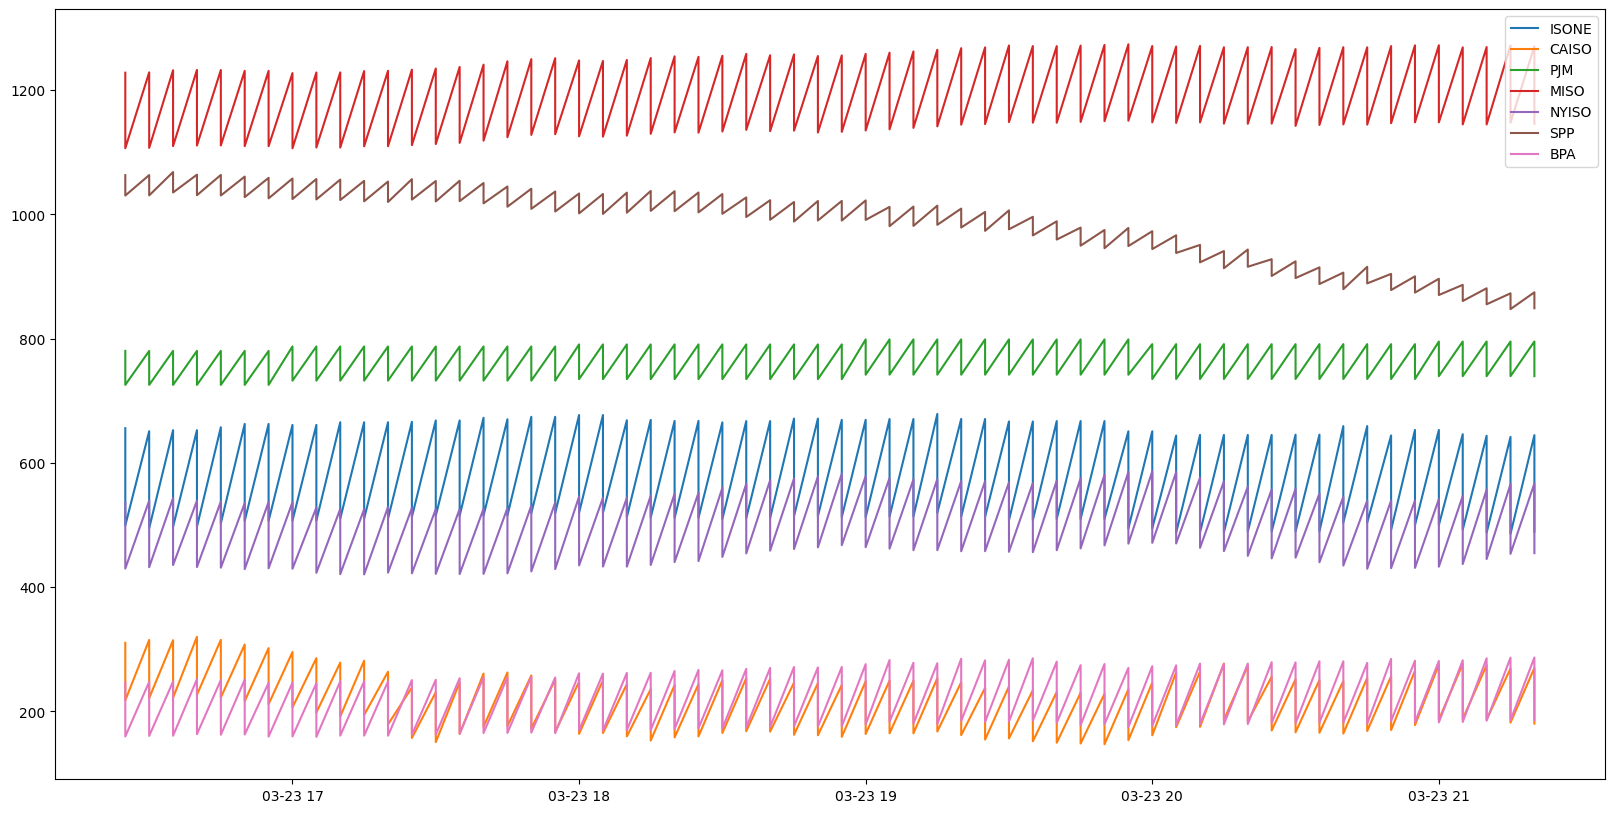

In [8]:
# plot the time series
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(df['timestamp'], df[['ISONE', 'CAISO', 'PJM', 'MISO', 'NYISO', 'SPP', 'BPA']])
plt.legend(['ISONE', 'CAISO', 'PJM', 'MISO', 'NYISO', 'SPP', 'BPA'])
plt.show()


In [9]:
# Let focus on SPP for now
# calculate the mean and standard deviation of the time series
mean = df['SPP'].mean()
std = df['SPP'].std()
print(f"Mean: {mean}, Std: {std}")


Mean: 981.352966704961, Std: 58.75759248024187


### Import Packages

From `tsfm_public`, we use the TinyTimeMixer model, forecasting pipeline, and plotting function. We also leverage a few components for the fine-tuning process.


In [10]:
import math
import os

import numpy as np
import pandas as pd
from torch.optim import AdamW
from torch.optim.lr_scheduler import OneCycleLR
from transformers import EarlyStoppingCallback, Trainer, TrainingArguments, set_seed
from tsfm_public import (
    TimeSeriesForecastingPipeline,
    TimeSeriesPreprocessor,
    TinyTimeMixerForPrediction,
    TrackingCallback,
    count_parameters,
    get_datasets,
)
from tsfm_public.toolkit.time_series_preprocessor import prepare_data_splits
from tsfm_public.toolkit.visualization import plot_predictions

### Specify configuration variables

We provide the names of the timestamp column and the target column to be predicted. The context length (in time steps) is set to match the pretrained model.

In [11]:
# TTM model branch
# Use main for 512-96 model
# Use "1024_96_v1" for 1024-96 model
TTM_MODEL_REVISION = "main"
context_length = 512  # the max context length for the 512-96 model
prediction_length = 96  # the max prediction length for the 512-96 model


### Read in the data

We parse the Parquet into a pandas dataframe, filling in any null values, and create a single window containing `context_length` time points

In [12]:
timestamp_column = "timestamp"
target_columns = ["SPP"]

# Read in the data from the downloaded file.
df = df[['timestamp', 'SPP']]
df = df.dropna()
# the timestamp is every 10 seconds, reset to 1 second. 
df['timestamp'] = pd.date_range(start='2017-03-23', periods=len(df), freq='s')
df = df.reset_index(drop=True)
df.head()

input_df = df.copy()
input_df = input_df.rename(columns={"timestamp": timestamp_column})
# Show the last few rows of the dataset.
input_df.tail()

,timestamp,SPP
131215,2017-03-24 12:26:55,853.745079
131216,2017-03-24 12:26:56,853.745079
131217,2017-03-24 12:26:57,848.924244
131218,2017-03-24 12:26:58,848.924244
131219,2017-03-24 12:26:59,848.924244


### Plot a segment of the target series

Here we inspect a preview of the target time series.

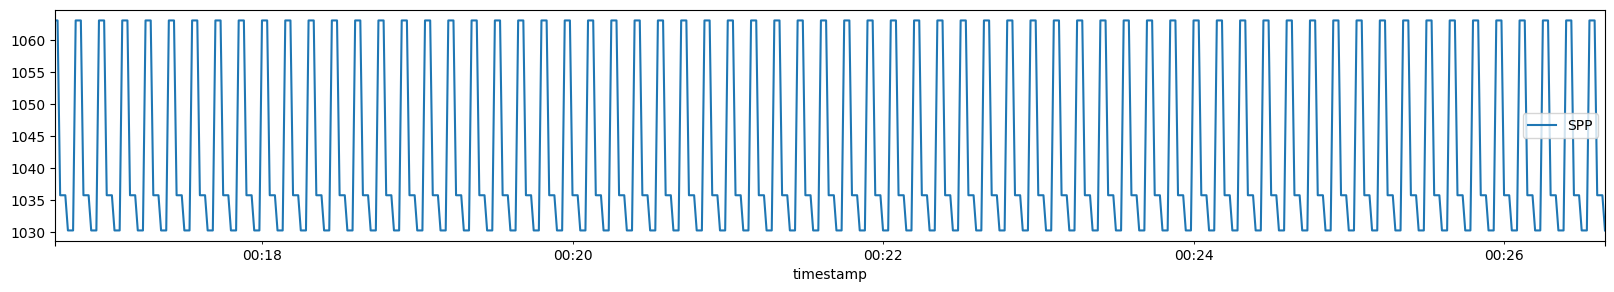

In [13]:
for target_column in target_columns:
    input_df.iloc[1000 : 1000 + 60 * 10].plot(
        x=timestamp_column, y=target_column, figsize=(20, 3)
    )

## Zero shot forecasting

In the first part of this notebook, we focus on zero-shot inference of the targets only. This does not consider the relationships between the targets or any of the additional exogenous features in the dataset.

### Split the data into training, validation, and testing sets

We split the data into training, validation, and test sets. The training set is used to train the preprocessor, while the test set is used to evaluate the model performance.

In [14]:
split_config = {"train": 0.5, "test": 0.25}

train_df, valid_df, test_df = prepare_data_splits(
    input_df, context_length=context_length, split_config=split_config
)
print(
    f"Data lengths: train = {len(train_df)}, val = {len(valid_df)}, test = {len(test_df)}"
)

Data lengths: train = 65610, val = 33317, test = 33317


### Train the Preprocessor

The preprocessor is trained on the training portion of the input data to learn the scaling factors. The scaling will be applied when we use the preprocess method of the time series preprocessor.

In [15]:
tsp = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    target_columns=target_columns,
    context_length=context_length,
    prediction_length=prediction_length,
    scaling=True,
    scaler_type="standard",
)

trained_tsp = tsp.train(train_df)

### Generate zero-shot forecasts and evaluate

To generate forecasts from the zero-shot model we first load the model and then configure a TimeSeriesForecastingPipeline. The pipeline is responsible for using the zero-shot model and the preprocessor to create forecasts and output the results.

In [16]:
zeroshot_model = TinyTimeMixerForPrediction.from_pretrained(
    "ibm-granite/granite-timeseries-ttm-v1",  # Name of the model on HuggingFace.
    revision=TTM_MODEL_REVISION,
    num_input_channels=len(target_columns),  # Number of input columns.
)

In [17]:
pipeline = TimeSeriesForecastingPipeline(
    zeroshot_model,
    device="cpu",  # Specify your local GPU or CPU.
    feature_extractor=tsp,
)

# Make a forecast on the target column given the input data.
zeroshot_forecast = pipeline(test_df)
zeroshot_forecast.head()

Device set to use cpu


,timestamp,SPP_prediction,SPP
0,2017-03-24 03:20:14,"[943.8528846099576, 945.9247564772195, 946.925...","[950.8280724742505, 950.8280724742505, 950.828..."
1,2017-03-24 03:20:15,"[948.8244700381061, 948.8076395796371, 948.990...","[950.8280724742505, 950.8280724742505, 928.000..."
2,2017-03-24 03:20:16,"[949.3203934044171, 949.2266944234447, 949.235...","[950.8280724742505, 928.0008367932832, 928.000..."
3,2017-03-24 03:20:17,"[949.6517271443779, 949.3664155152222, 949.029...","[928.0008367932832, 928.0008367932832, 928.000..."
4,2017-03-24 03:20:18,"[942.4900512000687, 945.3030006831784, 946.147...","[928.0008367932832, 928.0008367932832, 922.811..."


In [18]:
# Define some standard metrics.
def custom_metric(actual, prediction, column_header="results"):
    """Simple function to compute MSE"""
    a = np.asarray(actual.tolist())
    p = np.asarray(prediction.tolist())

    mask = ~np.any(np.isnan(a), axis=1)

    mse = np.mean(np.square(a[mask, :] - p[mask, :]))
    mae = np.mean(np.abs(a[mask, :] - p[mask, :]))
    return pd.DataFrame(
        {
            column_header: {
                "mean_squared_error": mse,
                "root_mean_squared_error": np.sqrt(mse),
                "mean_absolute_error": mae,
            }
        }
    )


custom_metric(
    zeroshot_forecast["SPP"], zeroshot_forecast["SPP_prediction"], "zero-shot forecast"
)

,zero-shot forecast
mean_squared_error,140.108107
root_mean_squared_error,11.836727
mean_absolute_error,10.873214


### Plot the Predictions vs. Actuals

Plot the predictions vs. actuals for some random samples of time intervals in test dataset.

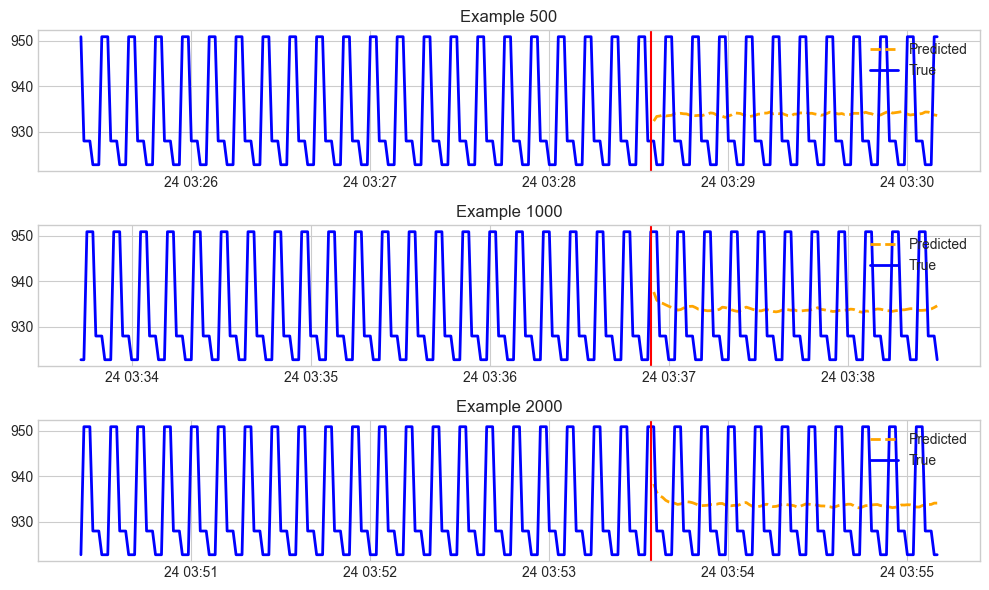

In [21]:
plot_predictions(
    input_df=test_df,
    predictions_df=zeroshot_forecast,
    freq="s",
    timestamp_column=timestamp_column,
    channel=target_columns[0],
    indices=[500, 1000, 2000],
)